<a href="https://colab.research.google.com/github/srishtivishnoi2102/Desi-Neural-Network-from-Scratch/blob/master/FillingBlanksWithAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import cv2
import pandas as pd
from sklearn.utils import shuffle


In [0]:
!unzip cats.zip

Archive:  cats.zip
replace cats/cat.4001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4001.jpg       
replace cats/cat.4002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y,A
  inflating: cats/cat.4002.jpg       
replace cats/cat.4003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4003.jpg       
replace cats/cat.4004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4004.jpg       
replace cats/cat.4005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4005.jpg       
replace cats/cat.4006.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4006.jpg       
replace cats/cat.4007.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4007.jpg       
replace cats/cat.4008.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4008.jpg       
replace cats/cat.4009.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cats/cat.4009.jpg       
replace cats/cat.4010.jpg? [y]es, 

In [0]:
import os
img_names=os.listdir('cats')

In [0]:
images_data=[]
IMG_SIZE = 256
for i in range(0,len(img_names)):
  temp=np.array(plt.imread('cats/'+img_names[i]))
 # temp=(temp.T[0]).T
  temp=cv2.resize(temp,(IMG_SIZE,IMG_SIZE))
#  temp=temp.reshape(IMG_SIZE,IMG_SIZE,1)
  images_data.append(temp)
images_data=np.array(images_data)
images_data=shuffle(images_data)

In [0]:
images_data=images_data.astype('float32')/255.0

In [0]:
images_data.shape

(1798, 256, 256, 3)

In [0]:
noised_images_data=images_data.copy()

x0=np.random.randint(50,200)
y0=np.random.randint(100,150)
xl=np.random.randint(25,40)
yl=np.random.randint(25,40)
noised_images_data[:,x0:x0+xl,y0:y0+yl]=1

In [0]:

x_train=images_data[:1600]
x_test=images_data[1600:]

In [0]:
noised_xtrain=noised_images_data[:1600]
noised_xtest=noised_images_data[1600:]

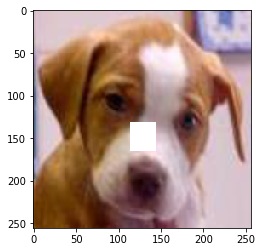

In [0]:
plt.imshow(noised_xtest[5])

In [0]:
x_test[0].shape

(256, 256, 3)

In [0]:
input_layer=Input(shape=x_test[0].shape)
num_of_codes=128

layer1=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(input_layer)
layer1=MaxPooling2D((2,2),padding='same')(layer1)

layer2=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(layer1)
encoded_layer=MaxPooling2D((2,2),padding='same')(layer2)

layer3=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(encoded_layer)
layer3=UpSampling2D((2,2))(layer3)

layer4=Conv2D(num_of_codes,(3,3),activation='relu',padding='same')(layer3)
layer4=UpSampling2D((2,2))(layer4)

decoder= Conv2D(3,(3,3),activation='relu',padding='same')(layer4)

In [0]:
noised_x_test.shape

(298, 256, 256, 3)

In [0]:
denoising_autoencoder=Model(input_layer,decoder)

In [0]:
denoising_autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [0]:
denoising_autoencoder.fit(noised_xtrain, x_train,epochs=50,batch_size=50,shuffle=True,validation_data=(noised_xtest,x_test))

Train on 1600 samples, validate on 198 samples
Epoch 1/50
1600/1600 [==============================] - 31s 19ms/step - loss: 0.5541 - val_loss: 0.5452
Epoch 2/50
1600/1600 [==============================] - 24s 15ms/step - loss: 0.5580 - val_loss: 0.5711
Epoch 3/50
1600/1600 [==============================] - 24s 15ms/step - loss: 0.5613 - val_loss: 0.5465
Epoch 4/50
1600/1600 [==============================] - 24s 15ms/step - loss: 0.5691 - val_loss: 0.5426
Epoch 5/50
1600/1600 [==============================] - 25s 15ms/step - loss: 0.5549 - val_loss: 0.5394
Epoch 6/50
1600/1600 [==============================] - 25s 15ms/step - loss: 0.5584 - val_loss: 0.5437
Epoch 7/50
1600/1600 [==============================] - 25s 16ms/step - loss: 0.5628 - val_loss: 0.5415
Epoch 8/50
1600/1600 [==============================] - 25s 16ms/step - loss: 0.5583 - val_loss: 0.5697
Epoch 9/50
1600/1600 [==============================] - 25s 16ms/step - loss: 0.5620 - val_loss: 0.5432
Epoch 10/50
1600/

In [0]:
prediction=denoising_autoencoder.predict(noised_xtest)

In [0]:
def showresult(n):
  plt.imshow(noised_xtest[n])
  plt.ylabel("noised")
  plt.show()
  plt.imshow(prediction[n])
  plt.ylabel("denoised")
  plt.show()
  plt.imshow(x_test[n])
  plt.ylabel("without noise")
  plt.show()

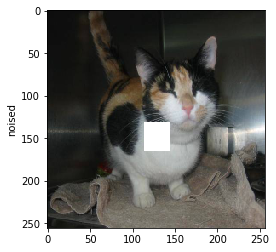

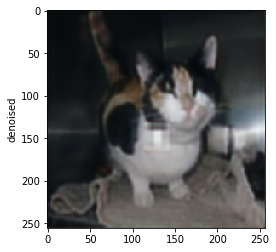

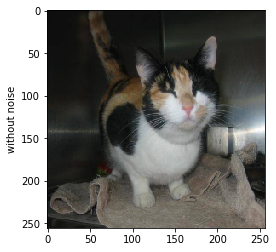

In [0]:
showresult(32)

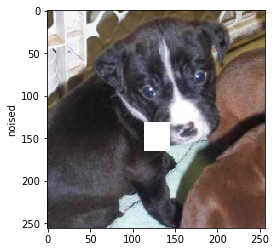

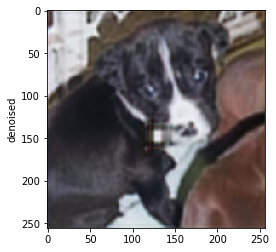

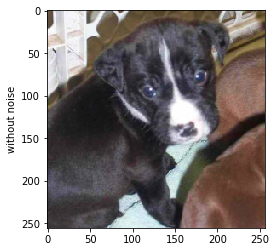

In [0]:
showresult(111)